In [25]:
from data_utils.html_utils import prune_dom_tree
from datasets import load_dataset

%load_ext autoreload
%autoreload 2
    
dataset = load_dataset("osunlp/Multimodal-Mind2Web", split="train")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

# Example

In [14]:
sample = dataset[10]
sample

{'action_uid': 'dfbd7cb5-d7b8-4500-b831-e7be9b8494eb',
 'raw_html': '<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">\n<html backend_node_id="17711" bounding_box_rect="0,0,1280,1080">\n  <body backend_node_id="17798" bounding_box_rect="0,0,1280,1080" class="">\n    <div backend_node_id="17803" bounding_box_rect="0,0,1280,1080" id="__next">\n      <aside backend_node_id="17804" bounding_box_rect="0,480,96,1080" class="jsx-3292870850 sidebar pgQSsticky collapsed">\n        <button backend_node_id="17805" bounding_box_rect="0,-9520,92,18.390625" type="button" class="jsx-3292870850">\n          <text backend_node_id="17806" bounding_box_rect="0,-9521,92,20">Focus Reset</text>\n        </button>\n        <button backend_node_id="17708" bounding_box_rect="84,516,24,24" class="jsx-4108951595 button button--primary jsx-522985103 sidebar-toggle contained centered round" type="button" title="Toggle Sidebar">\n          <svg backend_node_i

In [15]:
from lxml import etree
dom_tree = etree.fromstring(sample["cleaned_html"])
def prettyprint(element, **kwargs):
    xml = etree.tostring(element, pretty_print=True, **kwargs)
    print(xml.decode(), end='')
prettyprint(dom_tree)

<html backend_node_id="17711">
  <body backend_node_id="17798">
    <div backend_node_id="17803">
      <aside backend_node_id="17804">
        <button backend_node_id="17805" type="button">
          <text backend_node_id="17806">Focus Reset</text>
        </button>
        <button backend_node_id="17708" type="button" title="Toggle Sidebar">
          <svg backend_node_id="17807" class="ign-icon icon-left-chevron"/>
        </button>
        <nav backend_node_id="17809">
          <div backend_node_id="17810">
            <div backend_node_id="17811">
              <div backend_node_id="17812">
                <div backend_node_id="17813">
                  <a backend_node_id="17814" title="IGN">
                    <svg backend_node_id="17815" class="ign-icon icon-logo" role="img">
                      <title backend_node_id="17816">
                        <text backend_node_id="17817">IGN Logo</text>
                      </title>
                    </svg>
                  </a>

In [16]:
elements_of_interest = prune_dom_tree(dom_tree)
for element in elements_of_interest:
    print(element)

<button id=17805>Focus Reset</button>
<button id=17708 title="Toggle Sidebar"/>
<link id=17814 title="IGN">IGN Logo</link>
<link id=17821 title="Skip to content">Skip to content</link>
<link id=17829 title="Home">Home</link>
<button id=17834 title="Search">Search</button>
<button id=17841 title="Reviews">Reviews</button>
<button id=17849 title="News">News</button>
<link id=17857 title="Guides">Guides</link>
<button id=17864 title="Discover">Discover</button>
<link id=17873 title="Store">Store</link>
<link id=17879 title="Rewards">Rewards</link>
<button id=17884 title="Videos">Videos</button>
<button id=17894 title="More">More</button>
<text id=17907>Playlist</text>
<button id=17909 title="Add to Library" aria_label="Add to Library"/>
<link id=17915 title="Browse Playlist">Browse Playlist</link>
<text id=17942>Register for free or log in to build your IGN game library.</text>
<link id=17943>Browse Playlist</link>
<button id=17948 title="More"/>
<text id=17954>Site Themes</text>
<input i

# Apply to all samples

In [26]:
# Apply to all samples
dataset = dataset.map(lambda x: {"pruned_html": prune_dom_tree(etree.fromstring(x["cleaned_html"]))})
dataset

Map:   0%|          | 0/7775 [00:00<?, ? examples/s]

Dataset({
    features: ['action_uid', 'raw_html', 'cleaned_html', 'operation', 'pos_candidates', 'neg_candidates', 'website', 'domain', 'subdomain', 'annotation_id', 'confirmed_task', 'screenshot', 'action_reprs', 'pruned_html'],
    num_rows: 7775
})

In [24]:
dataset[11]["pruned_html"]

['<link id=287 title="Go to Discogs.com homepage" alt="Discogs"/>',
 '<input id=293 text Search artists, albums and more... Search artists, albums and more.../>',
 '<button id=297 aria_label="Search"/>',
 '<input id=303/>',
 '<button id=313>Explore</button>',
 '<link id=333>Explore All</link>',
 '<link id=337>Trending Releases</link>',
 '<link id=341>List Explorer</link>',
 '<link id=345>Advanced Search</link>',
 '<link id=358>Submission Guidelines</link>',
 '<link id=362>Submit a Release</link>',
 '<link id=366>How to Make a List</link>',
 '<link id=370>Monthly Leaderboard</link>',
 '<link id=374>Help Translate Discogs</link>',
 '<link id=387>Rock</link>',
 '<link id=391>Electronic</link>',
 '<link id=395>Hip Hop</link>',
 '<link id=399>Folk, World, & Country</link>',
 '<link id=403>Jazz</link>',
 '<link id=416>House</link>',
 '<link id=420>Punk</link>',
 '<link id=424>Soul</link>',
 '<link id=428>Experimental</link>',
 '<link id=432>Prog Rock</link>',
 '<button id=443>Marketplace</bu

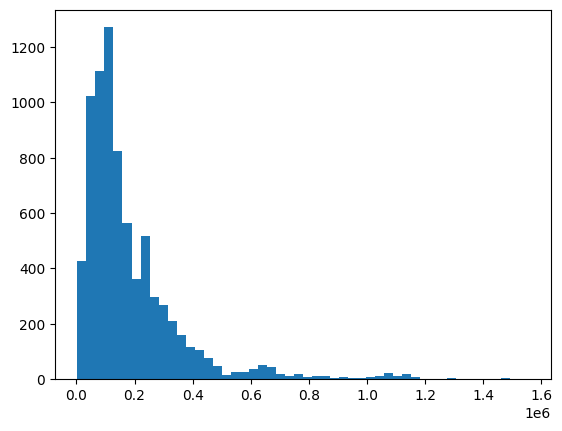

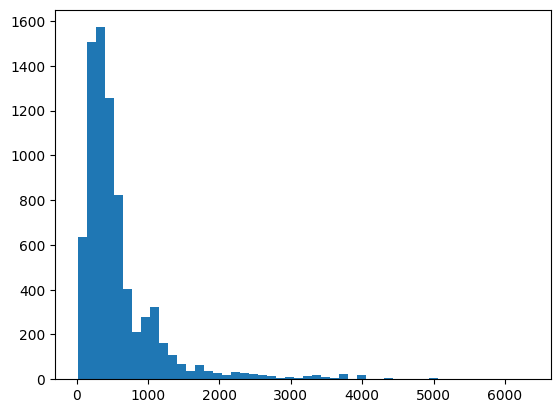

In [31]:
import matplotlib.pyplot as plt
cleaned_lens = [len(html) for html in dataset["cleaned_html"]]
plt.hist(cleaned_lens, bins=50)
plt.show()
pruned_lens = [len(html) for html in dataset["pruned_html"]]
plt.hist(pruned_lens, bins=50)
plt.show()